In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(r"C:\Users\idea\Downloads\boston_housing.csv")
boston_df.head(100)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2.0,276.0,18.0,6.65,28.4
96,96,0.11504,0.0,2.89,0.0,0.445,6.163,69.6,3.4952,2.0,276.0,18.0,11.34,21.4
97,97,0.12083,0.0,2.89,0.0,0.445,8.069,76.0,3.4952,2.0,276.0,18.0,4.21,38.7
98,98,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,3.57,43.8


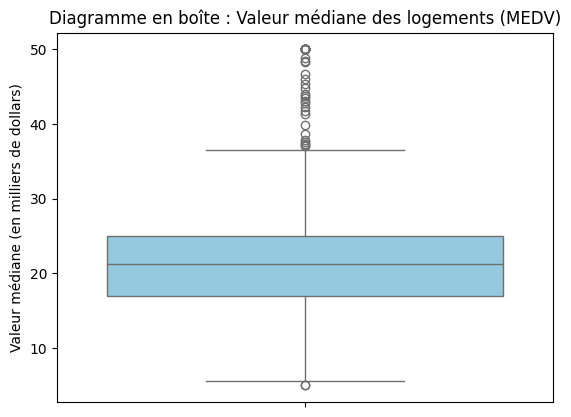

In [14]:
import matplotlib.pyplot as plt
sns.boxplot(data=df, y="MEDV", color='skyblue')
plt.title("Diagramme en boîte : Valeur médiane des logements (MEDV)")
plt.ylabel("Valeur médiane (en milliers de dollars)")
plt.show()

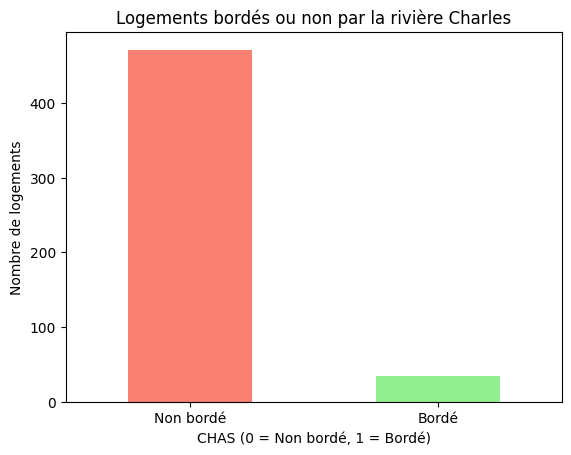

In [15]:
chas_counts = df['CHAS'].value_counts().sort_index()
chas_counts.plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title("Logements bordés ou non par la rivière Charles")
plt.xlabel("CHAS (0 = Non bordé, 1 = Bordé)")
plt.ylabel("Nombre de logements")
plt.xticks(ticks=[0, 1], labels=["Non bordé", "Bordé"], rotation=0)
plt.show()

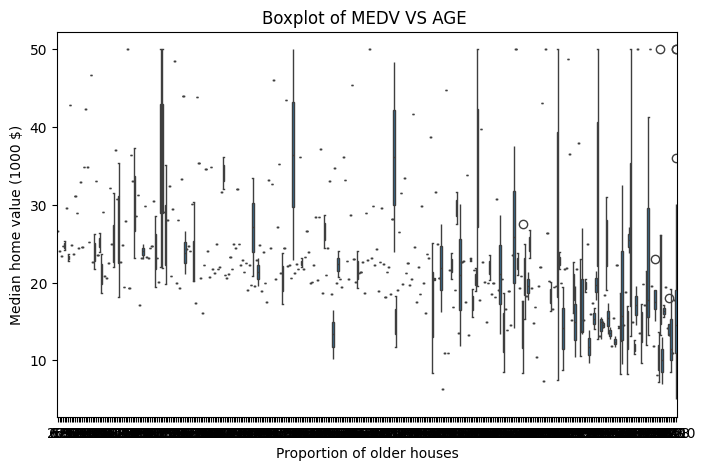

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(x=boston_df['AGE'],y=boston_df['MEDV'])
plt.title("Boxplot of MEDV VS AGE ")
plt.xlabel("Proportion of older houses")
plt.ylabel("Median home value (1000 $)")
plt.show()

C:\Users\idea\AppData\Local\Temp\ipykernel_2792\726778983.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="AGE_group", y="MEDV", data=df, palette="Set2")


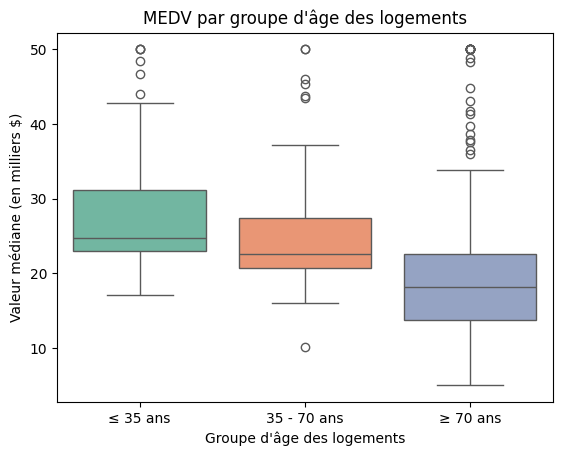

In [16]:
bins = [0, 35, 70, 100]
labels = ['≤ 35 ans', '35 - 70 ans', '≥ 70 ans']
df['AGE_group'] = pd.cut(df['AGE'], bins=bins, labels=labels)

sns.boxplot(x="AGE_group", y="MEDV", data=df, palette="Set2")
plt.title("MEDV par groupe d'âge des logements")
plt.xlabel("Groupe d'âge des logements")
plt.ylabel("Valeur médiane (en milliers $)")
plt.show()

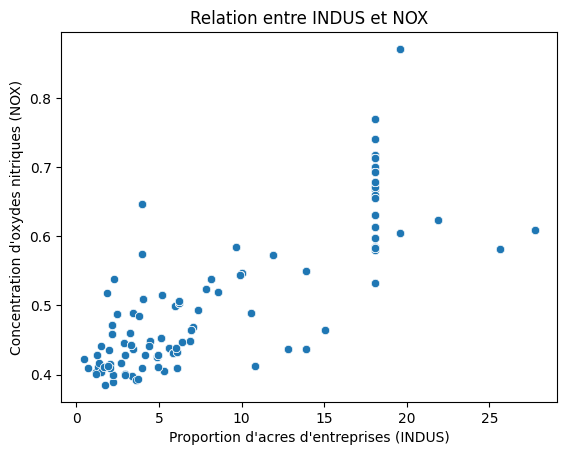

In [17]:
sns.scatterplot(x='INDUS', y='NOX', data=df)
plt.title("Relation entre INDUS et NOX")
plt.xlabel("Proportion d'acres d'entreprises (INDUS)")
plt.ylabel("Concentration d'oxydes nitriques (NOX)")
plt.show()

In [10]:
import matplotlib.pyplot as pyplot
plt.histplot(df['PTRATIO'], bins=15, color='orange', edgecolor='black',kde=True)
plt.title("Histogramme : Ratio élèves/enseignants")
plt.xlabel("PTRATIO")
plt.ylabel("Fréquence")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'histplot'

In [19]:
from scipy.stats import ttest_ind

medv_bord = df[df["CHAS"] == 1]["MEDV"]
medv_nonbord = df[df["CHAS"] == 0]["MEDV"]

t_stat, p_val = ttest_ind(medv_bord, medv_nonbord)
print("t-stat:", round(t_stat, 3), "| p-value:", round(p_val, 4))

t-stat: 3.996 | p-value: 0.0001


In [20]:
from scipy.stats import f_oneway

group1 = df[df['AGE_group'] == '≤ 35 ans']['MEDV']
group2 = df[df['AGE_group'] == '35 - 70 ans']['MEDV']
group3 = df[df['AGE_group'] == '≥ 70 ans']['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)
print("F-stat:", round(f_stat, 3), "| p-value:", round(p_val, 4))

F-stat: 36.408 | p-value: 0.0


In [21]:
from scipy.stats import pearsonr

corr, p_val = pearsonr(df['NOX'], df['INDUS'])
print("Coefficient de corrélation de Pearson:", round(corr, 3), "| p-value:", round(p_val, 4))


Coefficient de corrélation de Pearson: 0.764 | p-value: 0.0


In [22]:
import statsmodels.api as sm

X = sm.add_constant(df["DIS"])
y = df["MEDV"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 24 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        08:37:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0